In [86]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import graph_generator as gg
import graph_visualiser as gv
import importlib

In [160]:
importlib.reload(gg)
importlib.reload(gv)

<module 'graph_visualiser' from '/home/michal/PycharmProjects/algorithms/MOWNiT/lab2/graph_visualiser.py'>

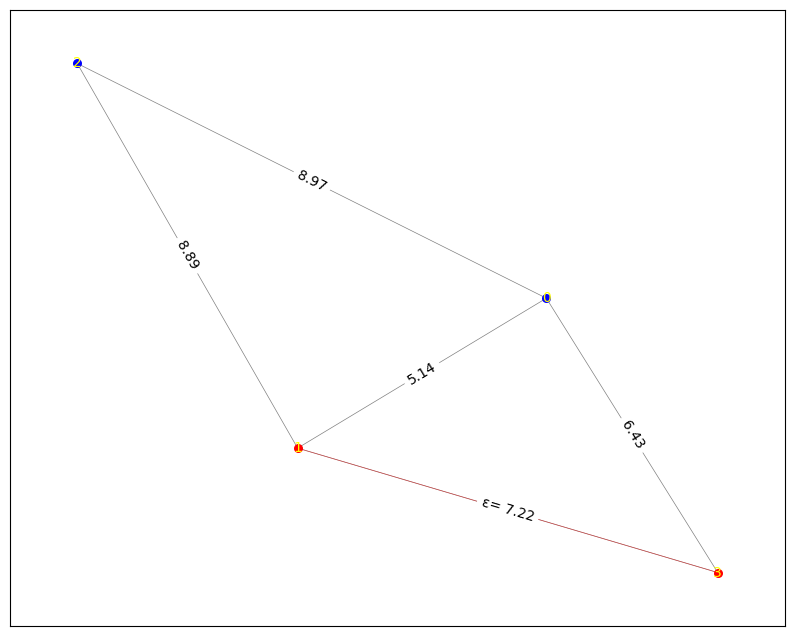

In [216]:
g, s, t, E = gg.generate_erdos_renyi(4, 0.4)
gv.draw_undirected_with_resistance(g, s, t, E)

In [217]:
n = g.number_of_nodes()
m = g.number_of_edges()
cycle_basis = nx.cycle_basis(g)
edge_to_label = {}
label_to_edge = {}

index = 0
for a, b in g.edges:
    if (a, b) not in [(s, t), (t, s)]:
        edge_to_label[(a, b)] = index
        edge_to_label[(b, a)] = index
        label_to_edge[index] = (a, b)
        index += 1

no_of_eq = len(cycle_basis) + n

A = np.zeros((m - 1, m - 1))
B = np.zeros(m - 1)


def analise_edge(a, b):
    if (a, b) == (s, t):
        B[eq_no] = E
    elif (a, b) == (t, s):
        B[eq_no] = -E
    else:
        edge_index = edge_to_label[(a, b)]
        if a < b:
            A[eq_no, edge_index] = g[a][b]["weight"]
        else:
            A[eq_no, edge_index] = -g[a][b]["weight"]

eq_no = 0
for cycle in cycle_basis:
    for i in range(1, len(cycle)):
        analise_edge(cycle[i-1], cycle[i])
    analise_edge(cycle[-1], cycle[0])
    eq_no += 1

vertex = 0
while eq_no < m - 1:
    for neighbor in g.neighbors(vertex):
        if (vertex, neighbor) not in [(s, t), (t, s)]:
            e_index = edge_to_label[(vertex, neighbor)]
            A[eq_no, e_index] = 1 if vertex < neighbor else -1
    vertex += 1
    eq_no += 1

ans = np.linalg.solve(A, B)
for i, tak in enumerate(ans):
    print(tak, i, label_to_edge[i])

0.3338391862091862 0 (0, 1)
0.5221587271477012 1 (0, 2)
-0.855997913356887 2 (0, 3)
0.33383918620918596 3 (1, 2)
